# Problem 1(a)

In [1]:
from pandas import Series
from matplotlib import pyplot
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
import os

#PriceStats = Series.from_csv('PriceStats_CPI.csv', header=0)
CPI= pd.read_csv('PriceStats_CPI_1.csv', header=0)
print(CPI.head())

#series.plot()
#pyplot.show()
#CPI

      date    CPI
0  7/24/08  100.0
1  7/25/08  100.0
2  7/26/08  100.0
3  7/27/08  100.0
4  7/28/08  100.0


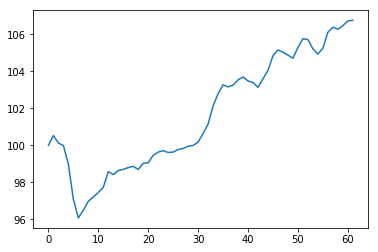

62


In [2]:
CPI['date'] = pd.to_datetime(CPI['date'])
CPI['month'] = CPI['date'].dt.month
CPI['year'] = CPI['date'].dt.year
CPItest=CPI.loc[(CPI['date']>='2013-09')]
CPItest1=CPItest
CPI= CPI.loc[(CPI['date']<'2013-09')]
CPImonthly=CPI.iloc[:,1:4]
CPImonthly=CPImonthly.drop_duplicates()
#CPImonthly['CPI']=np.log(CPImonthly['CPI'])
CPImonthly=CPImonthly.dropna()
CPImonthly['day'] = 1
CPImonthly['date'] = pd.to_datetime(CPImonthly[['day','month','year']])
CPIseries = pd.Series(CPImonthly['CPI'].values)
CPIseries.plot()
pyplot.show()
CPIseries = np.log(CPIseries)
pyplot.show()
print(len(CPIseries))

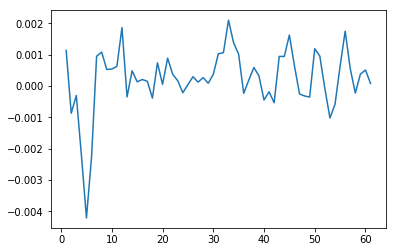

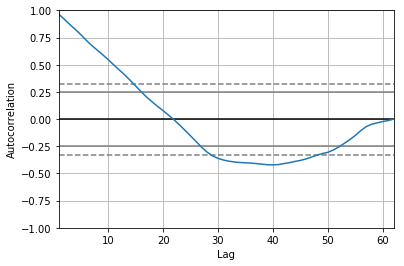

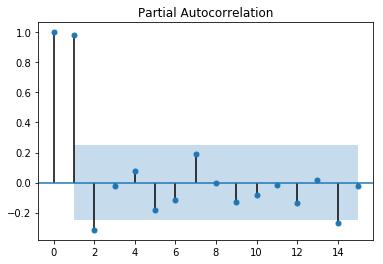

0     4.605170
1     4.610407
2     4.606407
3     4.605024
4     4.594871
5     4.575533
6     4.565136
7     4.569479
8     4.574440
9     4.576869
10    4.579362
11    4.582246
12    4.590800
13    4.589213
14    4.591453
15    4.592078
16    4.593041
17    4.593749
18    4.591986
19    4.595397
20    4.595647
21    4.599745
22    4.601480
23    4.602255
24    4.601278
25    4.601489
26    4.602869
27    4.603450
28    4.604695
29    4.605115
        ...   
32    4.616504
33    4.626207
34    4.632626
35    4.637320
36    4.636248
37    4.637134
38    4.639888
39    4.641405
40    4.639340
41    4.638496
42    4.636026
43    4.640417
44    4.644810
45    4.652376
46    4.655393
47    4.654218
48    4.652751
49    4.651120
50    4.656670
51    4.661122
52    4.660733
53    4.655983
54    4.653287
55    4.656240
56    4.664396
57    4.667007
58    4.665967
59    4.667746
60    4.670143
61    4.670537
Length: 62, dtype: float64
1     0.001137
2    -0.000868
3    -0.000300
4    -0.00220

In [3]:
CPIdiff=CPIseries.pct_change()[1:len(CPIseries)]
CPIdiff.plot()
pyplot.show()
CPIseries
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot

#plot_pacf(CPIdiff, lags=20)
#CPIdiff
autocorrelation_plot(CPIseries)
plot_pacf(CPIseries, lags=15)
pyplot.show()
print((CPIseries))
print((CPIdiff))
#CPIseries

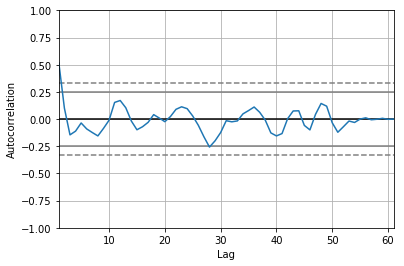

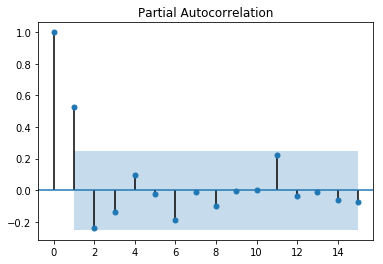

In [4]:
CPIdiff=CPIseries.pct_change()[1:len(CPIseries)]
CPIdiff
CPIseries
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot

#plot_pacf(CPIdiff, lags=20)
#CPIdiff
autocorrelation_plot(CPIdiff)
plot_pacf(CPIdiff, lags=15)
pyplot.show()

pyplot.show()
#CPIseries

The series is stationary because autocorrelation plot goes -ve
The PACF shows order 1

## 

In [5]:
from statsmodels.tsa.arima_model import ARIMA
#

model = ARIMA(CPIdiff,order=(1,0,0))
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

#CPItest=CPI.loc[(CPI['month']>9) & (CPI['year']>2013)]
CPItest=CPItest.iloc[:,1:4]
CPItest=CPItest.drop_duplicates()
#CPItest['CPI']=np.log(CPItest['CPI'])
CPItest=CPItest.dropna()
CPItest = pd.Series(CPItest['CPI'].values)
CPItest=CPItest.pct_change()
#predictions = model_fit.predict(start=len(CPIdiff), end=len(CPIdiff)+len(CPItest)-1, dynamic=False)
#error = mean_squared_error(test, predictions)

len(CPItest)

Lag: 1
Coefficients: const      0.000244
ar.L1.y    0.516746
dtype: float64


61

In [6]:
CPItest=CPItest[1:len(CPItest)]
import sklearn as sk
from sklearn.metrics import mean_squared_error
predictions = model_fit.predict(start=len(CPIdiff), end=len(CPIdiff)+len(CPItest)-1)#, dynamic=False)
error = mean_squared_error(CPItest, predictions)

In [7]:
error

9.237963058899138e-06

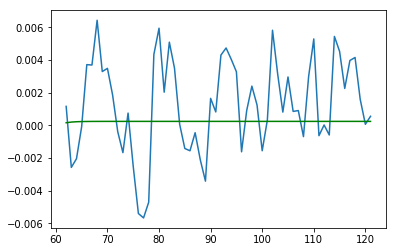

In [8]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest))
pyplot.plot((predictions), color='green')
pyplot.show()

In [9]:
predictions1 = predictions.copy()
CPItest2 = CPItest.copy()
predictions1[62]=106.75*(1+predictions1[62])
for i in range(63,122):
    predictions1[i]=predictions1[i-1]*(1+predictions1[i])

In [10]:
CPItest2[1]=106.75*(1+CPItest2[1])
for i in range(2,61):
    CPItest2[i]=CPItest2[i-1]*(1+CPItest2[i])

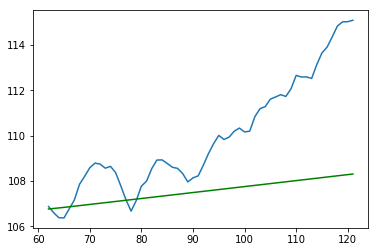

In [11]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest2))
pyplot.plot((predictions1), color='green')
pyplot.show()

In [12]:
ber = pd.read_csv("T10YIE.csv")
ber['T10YIE'] = ber['T10YIE'].convert_objects(convert_numeric=True)
ber['DATE'] = pd.to_datetime(ber['DATE'])
ber['month'] = ber['DATE'].dt.month
ber['year'] = ber['DATE'].dt.year
test_ber = ber.loc[(ber['DATE']>='2013-09-01')]
test_ber_inflat = test_ber.groupby(['year','month'],as_index = False).agg({'T10YIE':'mean'})
test_ber_inflat.columns = ['year','month','average_ber']
test_ber_inflat
test_ber_inflat['day'] = 1
test_ber_inflat['date'] = pd.to_datetime(test_ber_inflat[['day','month','year']])
#pyplot.plot(test_ber_inflat.average_ber)

In [13]:
train_ber = ber.loc[(ber['DATE']<'2013-09-01')]
train_ber_inflat = train_ber.groupby(['year','month'],as_index = False).agg({'T10YIE':'mean'})
train_ber_inflat.columns = ['year','month','average_ber']
train_ber_inflat
train_ber_inflat['day'] = 1
train_ber_inflat['date'] = pd.to_datetime(train_ber_inflat[['day','month','year']])

In [14]:
PS=pd.read_csv('PriceStats_CPI.csv')
PS['PriceStats'] = PS['PriceStats'].convert_objects(convert_numeric=True)
PS['date'] = pd.to_datetime(PS['date'])
PS['month'] = PS['date'].dt.month
PS['year'] = PS['date'].dt.year
test_PS = PS.loc[(PS['date']>='2013-09-01')]
test_PS_inflat = test_PS.groupby(['year','month'],as_index = False).agg({'PriceStats':'mean'})
test_PS_inflat.columns = ['year','month','average_PS']
test_PS_inflat
test_PS_inflat['day'] = 1
test_PS_inflat['date'] = pd.to_datetime(test_PS_inflat[['day','month','year']])
monthly_infl_rate=test_PS_inflat.average_PS.pct_change()
test_PS_inflat['monthly_rate']=monthly_infl_rate
#pyplot.plot(test_PS_inflat.monthly_rate)

In [15]:
train_PS = PS.loc[(PS['date']<'2013-09-01')]
train_PS_inflat = train_PS.groupby(['year','month'],as_index = False).agg({'PriceStats':'mean'})
train_PS_inflat.columns = ['year','month','average_PS']
train_PS_inflat
train_PS_inflat['day'] = 1
train_PS_inflat['date'] = pd.to_datetime(train_PS_inflat[['day','month','year']])
monthly_infl_rate=train_PS_inflat.average_PS.pct_change()
train_PS_inflat['monthly_rate']=monthly_infl_rate

I am defining inflation rate with respect to a base year

In [16]:
CPItest1['day'] = 1
CPItest1['date'] = pd.to_datetime(CPItest1[['day','month','year']])
CPItest1=CPItest1.drop_duplicates()
CPImonth=CPItest1.reset_index()
predict=predictions.reset_index()

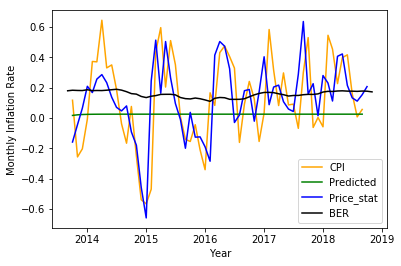

In [40]:
pyplot.plot(CPImonth['date'][1:len(CPImonth)-2],CPItest*100,color='orange',label='CPI')
pyplot.plot(CPImonth['date'][1:len(CPImonth)-2],(predict[0])*100, color='green', label='Predicted')
pyplot.plot(test_PS_inflat.date,test_PS_inflat.monthly_rate*100, color='blue',label = 'Price_stat')
pyplot.plot(test_ber_inflat.date,test_ber_inflat.average_ber/12, color='black', label= 'BER')
pyplot.xlabel('Year')
pyplot.ylabel('Monthly Inflation Rate')
pyplot.legend()
pyplot.show()

In [41]:
exregtrain=[]
exregtest=[]
for i in range(1,62):
    exregtest.append([test_PS_inflat.monthly_rate[i]*100, test_ber_inflat.average_ber[i]/12])
    exregtrain.append([train_PS_inflat.monthly_rate[i]*100, train_ber_inflat.average_ber[i]/12])

In [42]:
from statsmodels.tsa.arima_model import ARIMA

model = AR(CPIseries)
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(CPIseries), end=len(CPIseries)+len(CPItest)-1, dynamic=True)
error = mean_squared_error(np.exp(CPItest), np.exp(predictions))

model2=ARIMA(CPIdiff, order=(1,0,0),exog= exregtrain)
#model3=ARIMA(CPIseries, order=(1,1,0))

model_2 = model2.fit()
#model_3= model3.fit(maxlag=1)

predictions2 = model_2.predict(start=len(CPIdiff), end=len(CPIdiff)+len(CPItest)-1, dynamic=True, exog=exregtest)
error2 = mean_squared_error((CPItest), (predictions2))

residuals = pd.DataFrame(model_2.resid)
residuals.plot(kind='kde')
#predictions3 = model_3.predict(start=len(CPIseries), end=len(CPIseries)+len(CPItest)-1, dynamic=False)




NameError: name 'AR' is not defined

In [43]:
predictions4 = predictions2.copy()
predictions4[62]=106.75*(1+predictions4[62])

for i in range(63,122):
    predictions4[i]=predictions4[i-1]*(1+predictions4[i])

error2

NameError: name 'predictions2' is not defined

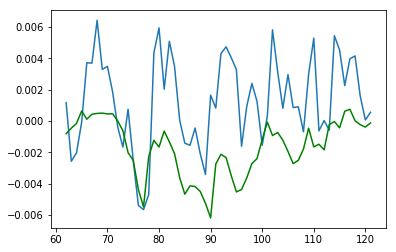

In [215]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest))
pyplot.plot((predictions2), color='green')
pyplot.show()

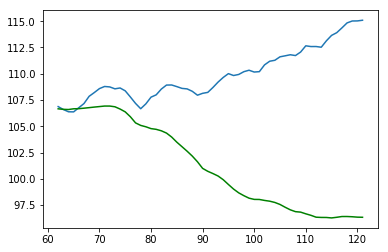

In [216]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest2))
pyplot.plot((predictions4), color='green')
pyplot.show()

In [217]:
test_ber_inflat2 = test_ber.groupby(['year','month'],as_index = False).agg({'T10YIE':lambda x: x.iloc[-1]})
test_ber_inflat2.columns = ['year','month','end_ber']
test_ber_inflat2
test_ber_inflat2['day'] = 1
test_ber_inflat2['date'] = pd.to_datetime(test_ber_inflat2[['day','month','year']])

test_PS_inflat2 = test_PS.groupby(['year','month'],as_index = False).agg({'PriceStats':lambda x: x.iloc[-1]})
test_PS_inflat2.columns = ['year','month','average_PS']
test_PS_inflat2
test_PS_inflat2['day'] = 1
test_PS_inflat2['date'] = pd.to_datetime(test_PS_inflat2[['day','month','year']])
monthly_infl_rate2=test_PS_inflat.average_PS.pct_change()
test_PS_inflat2['monthly_rate']=monthly_infl_rate2

In [218]:
train_ber_inflat2 = train_ber.groupby(['year','month'],as_index = False).agg({'T10YIE':lambda x: x.iloc[-1]})
train_ber_inflat2.columns = ['year','month','end_ber']
train_ber_inflat2
train_ber_inflat2['day'] = 1
train_ber_inflat2['date'] = pd.to_datetime(train_ber_inflat2[['day','month','year']])

train_PS_inflat2 = train_PS.groupby(['year','month'],as_index = False).agg({'PriceStats':lambda x: x.iloc[-1]})
train_PS_inflat2.columns = ['year','month','average_PS']
train_PS_inflat2
train_PS_inflat2['day'] = 1
train_PS_inflat2['date'] = pd.to_datetime(train_PS_inflat2[['day','month','year']])
monthly_infl_rate2=train_PS_inflat.average_PS.pct_change()
train_PS_inflat2['monthly_rate']=monthly_infl_rate2

In [221]:
#train_ber_inflat2.end_ber

0      1.81
1      1.94
2      1.80
3      1.73
4      1.60
5      1.64
6      2.08
7      2.16
8      2.01
9      2.40
10     2.31
11     2.27
12     2.31
13     2.38
14     2.38
15     2.42
16      NaN
17     2.52
18     2.49
19     2.35
20     2.37
21     2.42
22     2.61
23     2.56
24     2.49
25     2.66
26     2.71
27     2.60
28     2.37
29     2.27
       ... 
98     2.48
99     2.57
100    2.25
101    2.43
102    2.44
103    2.05
104    1.75
105    2.09
106    2.05
107    1.96
108    2.11
109    2.26
110    2.32
111    2.25
112    2.09
113    2.13
114    2.20
115    2.25
116    2.42
117    2.50
118    2.41
119    2.45
120    2.59
121    2.53
122     NaN
123    2.34
124    2.21
125    1.99
126    2.22
127    2.10
Name: end_ber, Length: 128, dtype: float64

In [223]:
exreg2=[]

test_ber_inflat2.end_ber[54]=2.15
train_ber_inflat2.end_ber[16]=2.46
train_ber_inflat2.end_ber[122]=2.46


for i in range(1,62):
    exreg2.append([test_PS_inflat2.monthly_rate[i]*100, test_ber_inflat2.end_ber[i]/12])

exregtrain1=[]
exregtest1=[]
for i in range(1,62):
    exregtest1.append([test_PS_inflat2.monthly_rate[i]*100, test_ber_inflat2.end_ber[i]/12])
    exregtrain1.append([train_PS_inflat2.monthly_rate[i]*100, train_ber_inflat2.end_ber[i]/12])

In [224]:
model3=ARIMA(CPIdiff, order=(1,0,0),exog= exregtrain1)
#model3=ARIMA(CPIseries, order=(1,1,0))

model_3 = model3.fit()
#model_3= model3.fit(maxlag=1)

predictions3 = model_3.predict(start=len(CPIdiff), end=len(CPIdiff)+len(CPItest)-1, dynamic=True, exog=exregtest1)
error2 = mean_squared_error((CPItest), (predictions3))

#residuals = pd.DataFrame(model_2.resid)
#residuals.plot(kind='kde')
#predictions3 = model_3.predict(start=len(CPIseries), end=len(CPIseries)+len(CPItest)-1, dynamic=False)

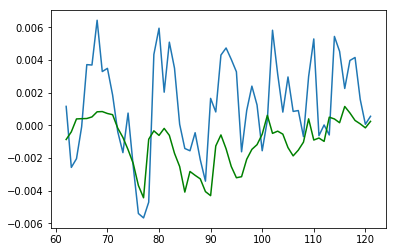

In [225]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest))
pyplot.plot((predictions3), color='green')
pyplot.show()

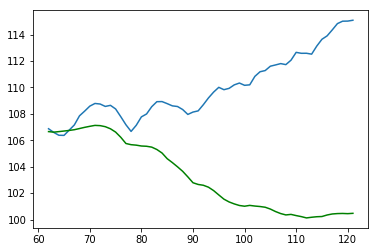

In [226]:
predictions5 = predictions3.copy()
predictions5[62]=106.75*(1+predictions5[62])

for i in range(63,122):
    predictions5[i]=predictions5[i-1]*(1+predictions5[i])

pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest2))
pyplot.plot((predictions5), color='green')
pyplot.show()

In [ ]:
error2

In [227]:
#from statsmodels.tsa.statespace import SARIMAX
import statsmodels.api as sm
model2=sm.tsa.statespace.SARIMAX(CPIdiff[1:len(CPIdiff)], order=(1,0,1), seasonal_order=(1,0,1,12), exog=exregtrain[1:len(exregtrain)])
#model3=ARIMA(CPIseries, order=(1,1,0))

model_2 = model2.fit()

predictions2 = model_2.predict(start=len(CPIdiff), end=len(CPIdiff)+len(CPItest)-1, dynamic=True, exog=exregtest)
error2 = mean_squared_error((CPItest), (predictions2))

predictions4 = predictions2.copy()
predictions4[63]=106.75*(1+predictions4[63])

for i in range(64,123):
    predictions4[i]=predictions4[i-1]*(1+predictions4[i])

error2

6.661318899477206e-06

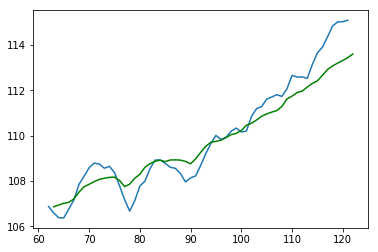

In [228]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest2))
pyplot.plot((predictions4), color='green')
pyplot.show()

In [232]:
exregtrain1=[]
exregtest1=[]
for i in range(1,62):
    exregtest1.append([test_PS_inflat2.monthly_rate[i]*100])#, test_ber_inflat2.end_ber[i]/12])
    exregtrain1.append([train_PS_inflat2.monthly_rate[i]*100])#, train_ber_inflat2.end_ber[i]/12])
    

#from statsmodels.tsa.statespace import SARIMAX
import statsmodels.api as sm

exreg2=[]
test_ber_inflat2.end_ber[54]=2.15
for i in range(1,62):
    exreg2.append([test_PS_inflat2.monthly_rate[i]*100])#, test_ber_inflat2.end_ber[i]/12])

model2=sm.tsa.statespace.SARIMAX(CPIdiff, order=(1,0,1), seasonal_order=(1,0,1,12), exog=exregtrain1)
#model3=ARIMA(CPIseries, order=(1,1,0))

model_2 = model2.fit()


predictions2 = model_2.predict(start=len(CPIdiff), end=len(CPIdiff)+len(CPItest)-1, dynamic=True, exog=exregtest1[1:62])
error2 = mean_squared_error((CPItest), (predictions2))

predictions4 = predictions2.copy()
predictions4[62]=106.75*(1+predictions4[63])

for i in range(63,122):
    predictions4[i]=predictions4[i-1]*(1+predictions4[i])

error2

7.302281585269136e-06

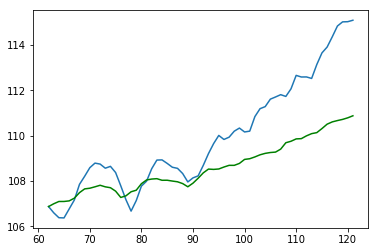

In [233]:
pyplot.plot(range(len(CPIseries),len(CPIseries)+len(CPItest)),(CPItest2))
pyplot.plot((predictions4), color='green')
pyplot.show()

In [ ]:
#test_ber_inflat.average_ber/12

In [ ]:
#